In [1]:
import sys
sys.path.append('..')

In [2]:
from sklearn.mixture import GaussianMixture

import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
train_W = pd.read_csv("../data/5k_mixed.csv")
train_X = pd.read_csv("../data/10k_mixed.csv")
train_Z = pd.read_csv("../data/15k_mixed.csv")

W = train_W[[str(x) for x in range(1, 10)]].values
X = train_X[[str(x) for x in range(1, 10)]].values
Z = train_Z[[str(x) for x in range(1, 10)]].values

V = [W, X, Z]

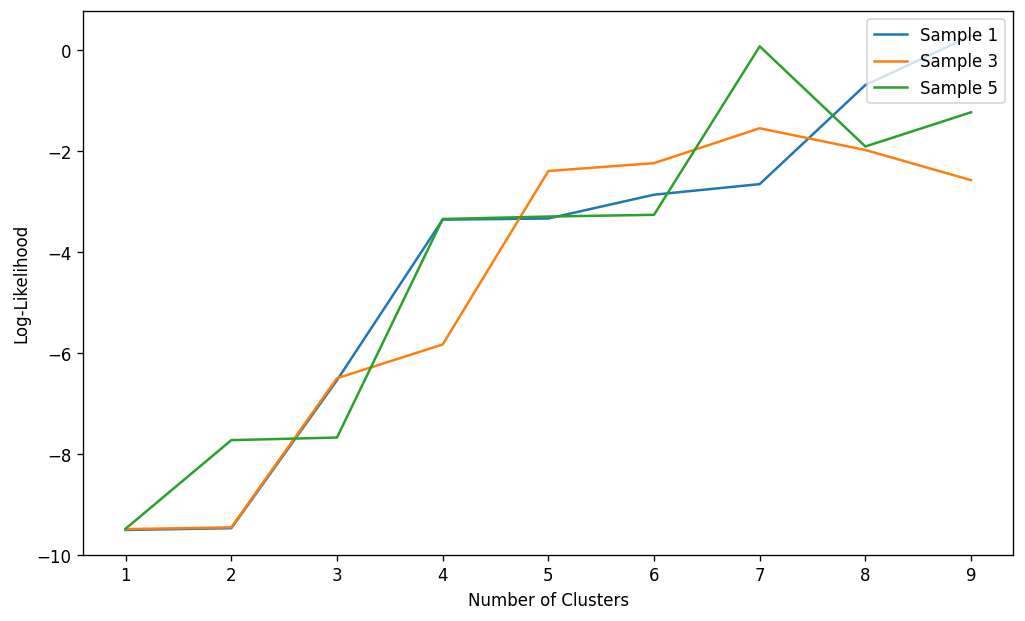

In [4]:
# initializing our plot
plt.figure(figsize=(10, 6), dpi=120)

# iteratively building models to identify an 'elbow' in the chart so that we may more easily identify the appropriate number of clusters
for i, df in enumerate(V):
    ll = dict()
    for k in range(1, 10):
        gmm = GaussianMixture(n_components=k, max_iter=2500).fit(df)
        ll[k] = gmm.score(df) # log-likelihood of the model
    plt.plot(list(ll.keys()), list(ll.values()), label=f"Sample {(2 * i) + 1}")

plt.xlabel("Number of Clusters")
plt.ylabel("Log-Likelihood")
plt.legend(loc="upper right")
plt.show()

~~We can see a trend with three of our of sample data sets where an elbow appears at n=2 components.~~

There is no determinable number of clusters given the results of these models.

In [5]:
# training a model to save for evaluation during a game of TTT
gmm_model = GaussianMixture(n_components=2)
gmm_model.fit(Z)
gdf = pd.DataFrame(gmm_model.predict_proba(X))
gdf

,0,1
0,0.474661,0.525339
1,0.590346,0.409654
2,0.964205,0.035795
3,0.096737,0.903263
4,0.333843,0.666157
...,...,...
9995,0.442782,0.557218
9996,0.154131,0.845869
9997,0.034678,0.965322
9998,0.313918,0.686082


In [6]:
# saving the model with pickle so it can be loaded into another program
pickle.dump(gmm_model, open("../model_binaries/gmm.sav", "wb"))